<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Classification model on Breast Cancer Data Set
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2022</b> <br>
    Arianna Febbo <br>
    Daniele Pittari <br>
    <a href="mailto:arianna.febbo@mail.polimi.it">arianna.febbo@mail.polimi.it</a><br>
    <a href="mailto:daniele.pittari@mail.polimi.it">daniele.pittari@mail.polimi.it</a><br>
    </div>
    </td>

</tr>
</table>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  
SEED=40

%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype, is_numeric_dtype
import scipy

np.random.seed(0)

In [2]:
colnames=['sample_id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marginal_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv('breast-cancer-wisconsin.csv', index_col=False, names=colnames, header=None)
df.head(10)
df.shape

,sample_id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


(699, 11)

   1. **Sample code number**:            id number
   2. **Clump Thickness**:               1 - 10
   3. **Uniformity of Cell Size**:       1 - 10
   4. **Uniformity of Cell Shape**:      1 - 10
   5. **Marginal Adhesion**:             1 - 10
   6. **Single Epithelial Cell Size**:   1 - 10
   7. **Bare Nuclei**:                   1 - 10
   8. **Bland Chromatin**:               1 - 10
   9. **Normal Nucleoli**:               1 - 10
  10. **Mitoses**:                       1 - 10
  11. **Class**:                        (2 for benign, 4 for malignant)

In [3]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

Class distribution:
 
- Benign: 458 (65.5%)
- Malignant: 241 (34.5%)


# 1. Exploratory Data Analysis (EDA)

## 1.1 Variable type inspection and data cleaning

<ins>**Variable type inspection**</ins>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sample_id               699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   unif_cell_size          699 non-null    int64 
 3   unif_cell_shape         699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epith_cell_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


The 'bare_nuclei' column should not be of type 'object'. It's due to the fact that there are missing values in them.  We will convert them in type 'int64'.

<ins>**Checking for missing values**</ins>

In [5]:
print('n° of missing values column sample_id is', sum(df['sample_id'] == '?'))
print('n° of missing values column clump_thickness is',sum(df['clump_thickness'] == '?'))
print('n° of missing values column unif_cell_size is',sum(df['unif_cell_size'] == '?'))
print('n° of missing values column unif_cell_shape is',sum(df['unif_cell_shape'] == '?'))
print('n° of missing values column marginal_adhesion is',sum(df['marginal_adhesion'] == '?'))
print('n° of missing values column single_epith_cell_size is',sum(df['single_epith_cell_size'] == '?'))
print('n° of missing values column bare_nuclei is',sum(df['bare_nuclei'] == '?'))
print('n° of missing values column bland_chromatin is',sum(df['bland_chromatin'] == '?'))
print('n° of missing values column normal_nucleoli is',sum(df['normal_nucleoli'] == '?'))
print('n° of missing values column mitoses is',sum(df['mitoses'] == '?'))

n° of missing values column sample_id is 0
n° of missing values column clump_thickness is 0
n° of missing values column unif_cell_size is 0
n° of missing values column unif_cell_shape is 0
n° of missing values column marginal_adhesion is 0
n° of missing values column single_epith_cell_size is 0
n° of missing values column bare_nuclei is 16
n° of missing values column bland_chromatin is 0
n° of missing values column normal_nucleoli is 0
n° of missing values column mitoses is 0


The total n° of missing values is 16 and they are all contained in the column 'bare_nuclei'.

<ins>**Filtering for missing values**</ins>

The 'bare_nuclei' column contains some missing values, denoted as '?' strings. Since only few samples contain missing values, we can safely remove them.

In [6]:
#drop rows with missing values
indexNames = df[(df['bare_nuclei'] == '?')].index
df.drop(indexNames, inplace=True)                  
df.shape

(683, 11)

<ins>**Converting to int type 'bare_nuclei' column**</ins>

In [7]:
df = df.astype({'bare_nuclei':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   sample_id               683 non-null    int64
 1   clump_thickness         683 non-null    int64
 2   unif_cell_size          683 non-null    int64
 3   unif_cell_shape         683 non-null    int64
 4   marginal_adhesion       683 non-null    int64
 5   single_epith_cell_size  683 non-null    int64
 6   bare_nuclei             683 non-null    int64
 7   bland_chromatin         683 non-null    int64
 8   normal_nucleoli         683 non-null    int64
 9   mitoses                 683 non-null    int64
 10  class                   683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


<ins>**Filtering for not relevant features**</ins>

We can also remove the 'sample_id' column, since it doesn't provide much information.

In [8]:
df = df.drop('sample_id', axis=1)
df.shape

(683, 10)

In [9]:
#statistical summary
df.describe()

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## 1.2 Univariate analysis
Visualize data distribution using histogram for numeric independent variables and bar chart for dependent variable.

Univariate analysis is useful to:
- identify if dataset contains outliers
- identify if data transformation is needed

### 1.2.1 Dependent variable: class

<AxesSubplot:>

Text(0.5, 0, 'class')

Text(0, 0.5, 'Count of Samples')

Text(0.5, 1.02, 'Count of Samples which are benign or malignant')

2    444
4    239
Name: class, dtype: int64

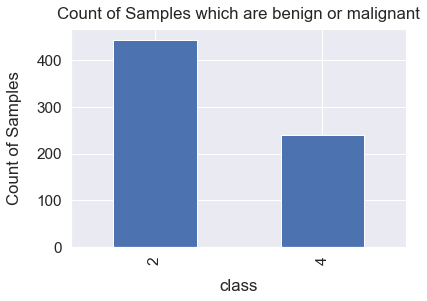

In [10]:
sns.set(font_scale=1.4)
df['class'].value_counts().plot(kind='bar');
plt.xlabel("class", labelpad=14);
plt.ylabel("Count of Samples", labelpad=14);
plt.title("Count of Samples which are benign or malignant", y=1.02);

df['class'].value_counts()

The class distribution is now: 

- Benign: 444 (65%)
- Malignant: 239 (35%)

### 1.2.2 Independent variables: numeric

In [11]:
df_without_class=df.copy(deep=True)
df_without_class = df_without_class.drop(['class'], axis=1)

array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'unif_cell_size'}>,
        <AxesSubplot:title={'center':'unif_cell_shape'}>],
       [<AxesSubplot:title={'center':'marginal_adhesion'}>,
        <AxesSubplot:title={'center':'single_epith_cell_size'}>,
        <AxesSubplot:title={'center':'bare_nuclei'}>],
       [<AxesSubplot:title={'center':'bland_chromatin'}>,
        <AxesSubplot:title={'center':'normal_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>]], dtype=object)

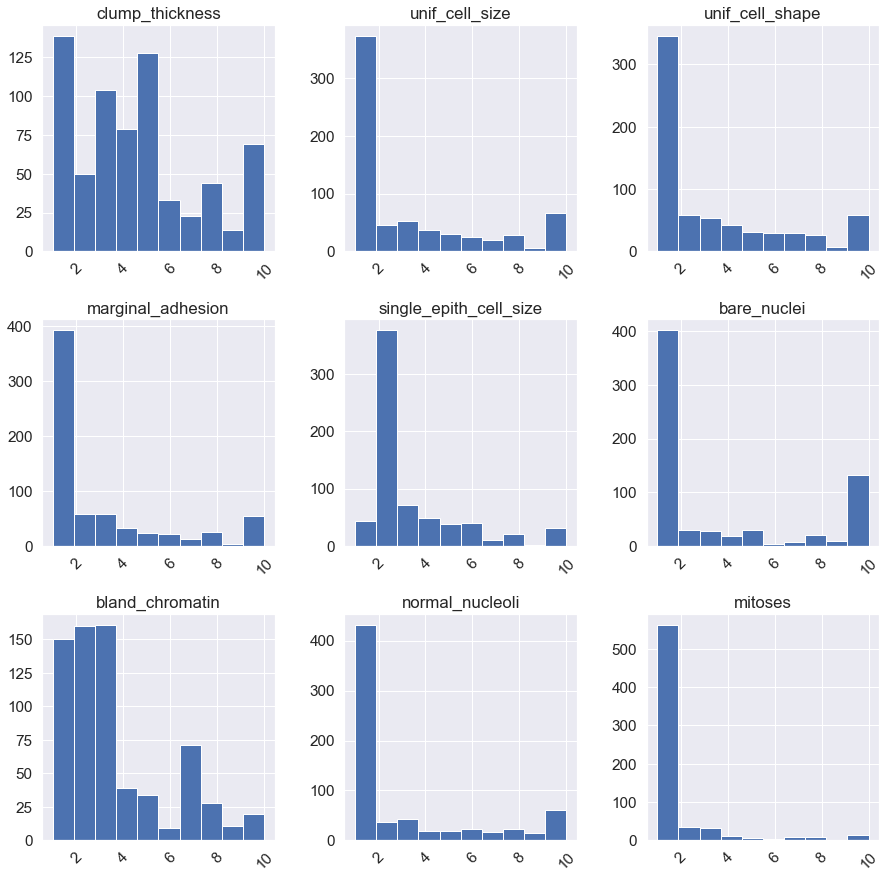

In [12]:
df_without_class.hist(figsize=(15,15), xrot=45)
plt.show()

**Observation**: 
- all the independent features besides 'clump_thickness' show a skeweness towards the left side of the graphs;

- all the independent features do not show a normal distribution.

## 1.3 Bivariate analysis

<ins>**Box plots of each numerical feature against the target 'class'**</ins>

<AxesSubplot:xlabel='clump_thickness', ylabel='class'>

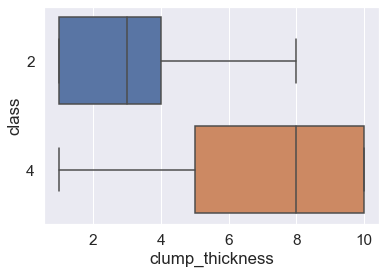

<AxesSubplot:xlabel='unif_cell_size', ylabel='class'>

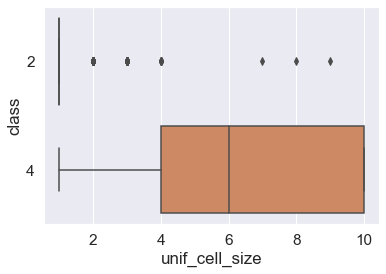

<AxesSubplot:xlabel='unif_cell_shape', ylabel='class'>

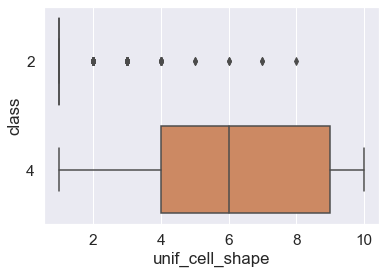

<AxesSubplot:xlabel='marginal_adhesion', ylabel='class'>

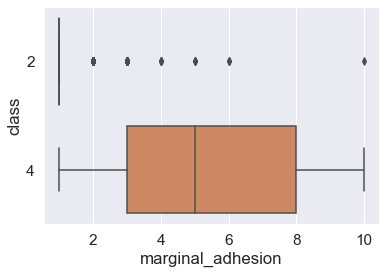

<AxesSubplot:xlabel='single_epith_cell_size', ylabel='class'>

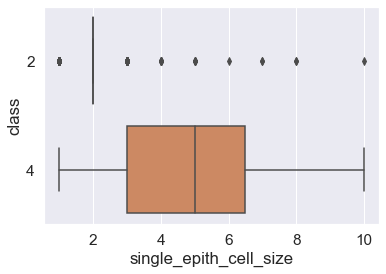

<AxesSubplot:xlabel='bare_nuclei', ylabel='class'>

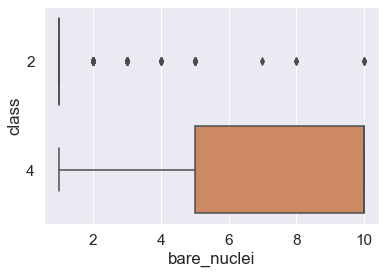

<AxesSubplot:xlabel='bland_chromatin', ylabel='class'>

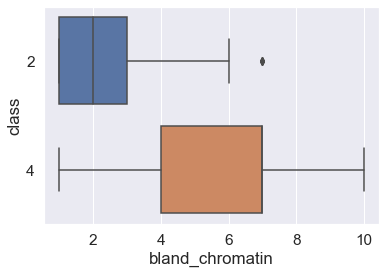

<AxesSubplot:xlabel='normal_nucleoli', ylabel='class'>

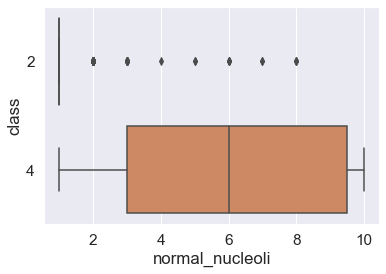

<AxesSubplot:xlabel='mitoses', ylabel='class'>

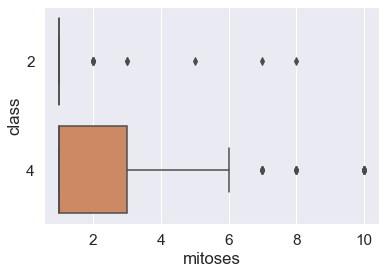

In [13]:
num_cols = ['clump_thickness','unif_cell_size', 'unif_cell_shape', 'marginal_adhesion', 'single_epith_cell_size','bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']
for col in num_cols:
    sns.boxplot(y = df['class'].astype('category'), x = col, data=df)
    plt.show()

**Observation**: We see that in the case of 'clump_thickness' a bigger proportion of samples which are malignant are tending towards a higher number of clump thickness meaning it could be a good predictor for our classification analysis.

In general, besides mitoses feature, we observe that malignant samples are associated to higher values in the independent variables.

All boxplots shows skewness of data towards lower value for benign samples.

<ins>**Heatmap of correlation matrix**</ins>

<Figure size 648x648 with 0 Axes>

<AxesSubplot:>

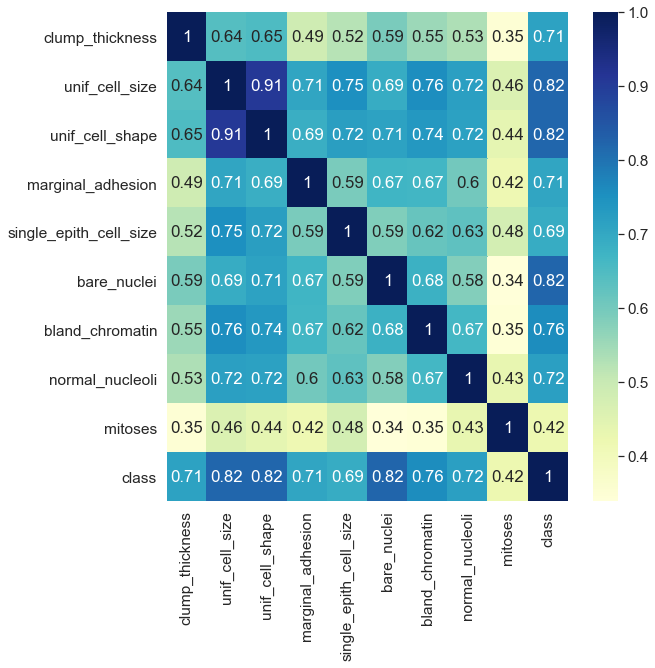

In [14]:
corr = df.corr()
plt.figure(figsize=(9,9));
sns.heatmap(corr, cmap='YlGnBu', annot=True);
plt.show()

**Observations:**

Independent variables showing high correlation with class: all the independent variables, besides 'mitoses', show high correlation coefficients with the target 'class'. The ones with highest correlation coefficients are 'unif_cell_size', 'unif_cell_shape' and 'bare_nuclei'.

'unif_cell_size' and 'unif_cell_shape' are also highly correlated with each other (0.82).
In general, all independent variables are correlated to each other, with the exception of 'mitoses' and 'clump_thickness' with respect to 'marginal_adhesion'.


**Class values change**: We will replace the '2' values (benign sample) with '0' and the '4' values (malignant sample) with '1'.

In [15]:
df["class"].replace({2: 0, 4: 1}, inplace=True)
df.head(3)

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0


# 2 Classification analysis

## 2.1 Classification with Logistic Regression

### 2.1.1 Single feature Logistic Regression

We have observed that among all features, 'unif_cell_size', 'unif_cell_shape' and 'bare_nuclei' show the highest correlation with 'class'. So, we will perform logistic regression with a single feature that we choose, for example, to be 'unif_cell_size'.

In [16]:
df_unif_cell_size = df.copy(deep=True)

In [17]:
#setting dependent variable
y = df_unif_cell_size['class'].to_numpy().astype(np.float32)
#setting independent variable
X_cell_size = df_unif_cell_size[['unif_cell_size']]

<ins>**Plotting logistic regression curve**</ins> 

<AxesSubplot:xlabel='unif_cell_size', ylabel='class'>

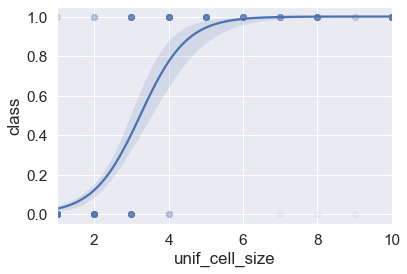

In [18]:
y1 = df_unif_cell_size['class']
sns.regplot(x=X_cell_size, y=y1, data=df_unif_cell_size, logistic=True,scatter_kws={'alpha':0.05})

**Observation**: The x-axis shows the values of the predictor variable “unif_cell_size” and the y-axis displays the predicted probability of a sample of being benign or malignant.

We can clearly see that higher values of unif_cell_size are associated with higher probabilities that a sample is malignant.

Darker blue color dots indicate higher number of observations, again underlying that higher numbers of 'unif_cell_size' corresponds the class 'malignant'.

<ins>**Data split**</ins> 

We know split our data into training and test (80% training, 20% test)

In [19]:
from sklearn.model_selection import train_test_split
X_train_cell_size, X_test_cell_size, y_train, y_test = train_test_split(X_cell_size, y,
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [20]:
from sklearn.linear_model import LogisticRegression             # 1- model selection
model_cell_size = LogisticRegression(solver="newton-cg", penalty='none')  # 2- hyperparams
model_cell_size.fit(X_train_cell_size, y_train)                                     # 2- model fitting

LogisticRegression(penalty='none', solver='newton-cg')

In [21]:
# Print the estimated coefficients
print("beta0 =", model_cell_size.intercept_.squeeze())
print("beta1 =", model_cell_size.coef_.squeeze())

beta0 = -4.97840818653316
beta1 = 1.4759842899802424


Classification accuracy is a metric used to evaluate the performance of a classification model. It's calculated as the number of correct predictions divided by the total number of predictions.

In [22]:
def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

In [23]:
print("Train accuracy:", accuracy(y_train, model_cell_size.predict(X_train_cell_size)))
print("Test accuracy:", accuracy(y_test, model_cell_size.predict(X_test_cell_size)))

Train accuracy: 0.9322344322344323
Test accuracy: 0.9197080291970803


<ins>**Predicting class and probabilities for cell_size of 3 and 4**</ins> 

In [24]:
%%capture --no-display 
model_cell_size.predict(np.array([[3]]))
model_cell_size.predict(np.array([[4]]))

array([0.], dtype=float32)

array([1.], dtype=float32)

cell_size 3: returns 0 (benign) as the class predicted to be associated to a sample with cell size of 3;

cell_size 4: return 1 (malignant) as the class predicted to be associated to a sample with cell size of 4.

In [25]:
%%capture --no-display 
model_cell_size.predict_proba(np.array([[3]]))
model_cell_size.predict_proba(np.array([[4]]))

array([[0.63424122, 0.36575878]])

array([[0.28383267, 0.71616733]])

It returns: P(Y=0=benign|X_cell_size) and P(Y=1=malignant|X_cell_size).

cell_size 3: probability of 63% to be predicted as benign and probability of 37% to be predicted as malignant.

cell_size 4: probability of 28% to be predicted as benign and probability of 72% to be predicted as malignant.

<ins>**Z-test**</ins> 

We perform the statistical Z-test of the model parameters to check if 'unif_cell_size' is actually needed.
- we compute the Z score under the null hypothesis where $\beta_0$ is null
- compute the p-value usign the $\mathcal{N}(0,1)$ distribution
- check the p-value against a alpha value of 0.01

In [26]:
from scipy.stats import norm, zscore

def z_test(X, y, model, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    betas = np.concatenate([model.intercept_, model.coef_.reshape(-1)])
    
    # Compute the prediction
    pred = model.predict_proba(X) # [N, 2]
    y = y.reshape(-1)    
    X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    n_samples, n_features = X.shape
    
    V = np.diagflat(np.product(pred, axis=1))
    covLogit = np.linalg.inv(np.dot(np.dot(X.T, V), X))
    se_b = np.sqrt(np.diag(covLogit))
    
    z_stat_b = (betas - 0) / se_b

    # Compute the p-value (two-sided test)
    p_values = np.array([2 * norm.sf(np.abs(z_stat)) for z_stat in z_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = np.round(se_b, decimals=4)
    df["Z-stat"] = np.round(z_stat_b, decimals=1)
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    return df

z_test(X_train_cell_size, y_train, model_cell_size, ["Intercept", "unif_cell_size"], alpha=0.01)

,Name,Coefficients,Standard Errors,Z-stat,p-value,reject H0
0,Intercept,-4.978408,0.4088,-12.2,4.110601e-34,True
1,unif_cell_size,1.475984,0.1354,10.9,1.164399e-27,True


In [27]:
##NOT SURE## !!!
beta_unif_cell_size = model_cell_size.coef_[0]
print("1 unit of unif_cell_size increases the log odds by:", beta_unif_cell_size)
print("Which means increasing the odds by:", np.exp(beta_unif_cell_size))

1 unit of unif_cell_size increases the log odds by: [1.47598429]
Which means increasing the odds by: [4.37534026]


Since log-odds are ratio of probabilities, the actual increase of probability depends on where "we start from" on the logit function (i.e., from which cell size measure we start from when adding 1).

- Increasing cell size on a region where the logit function is vary flat (between 6 and 8), won't affect too much the output probability.

- Increasing cell size on regions where the curve is steeper (e.g. the pick of the curve) will have a higher effect on the output probability.

We plotted the behavior by inspecting how the difference $P(y|x_{cellsize}+1) - P(y|x_{cellsize})$ changes as a function of the starting point $x_{cellsize}$


Text(0.5, 0, 'cell_size')

Text(0, 0.5, 'P(Y=1|X) increase')

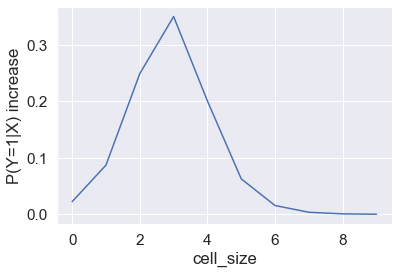

In [28]:
%%capture --no-display 
X_cell_size = np.arange(0, 10).reshape(-1, 1)
proba_cell_size = model_cell_size.predict_proba(X_cell_size)[:, 1]
proba_cell_size1 = model_cell_size.predict_proba(X_cell_size + 1)[:, 1]
incr = (proba_cell_size1 - proba_cell_size)

plt.plot(X_cell_size, incr)
plt.xlabel("cell_size")
plt.ylabel("P(Y=1|X) increase")

### 2.1.2 Multiple Logistic Regression

We know fit the model with all the independent variables.


In [29]:
df_full = df.copy(deep=True)
df_full.head(2)

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0


In [30]:
#setting independent variable
X_full = df_full[['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marginal_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']]

In [31]:
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y,
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [32]:
from sklearn.linear_model import LogisticRegression            # 1- model selection
model_LR = LogisticRegression(solver="newton-cg", penalty='none') # 2- hyperparams
model_LR.fit(X_full_train, y_train)                               # 3- model fitting
y_predict = model_LR.predict(X_full_train)                        # 4- model testing

print("Train accuracy:", accuracy(y_train, model_LR.predict(X_full_train)))
print("Test accuracy:", accuracy(y_test, model_LR.predict(X_full_test)))

LogisticRegression(penalty='none', solver='newton-cg')

Train accuracy: 0.967032967032967
Test accuracy: 0.9708029197080292


By training the model with all the features we increase the test accuracy from 92% to 97%.

In [33]:
features = ['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marginal_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']
z_test(X_full_train, y_train, model_LR, ["Intercept", *features], alpha=0.01)

,Name,Coefficients,Standard Errors,Z-stat,p-value,reject H0
0,Intercept,-9.999356,1.2699,-7.9,3.427212e-15,True
1,clump_thickness,0.492693,0.1479,3.3,8.673657e-04,True
2,unif_cell_size,0.016392,0.2206,0.1,9.407564e-01,False
3,unif_cell_shape,0.292184,0.2477,1.2,2.380920e-01,False
4,marginal_adhesion,0.339751,0.1275,2.7,7.727628e-03,True
5,single_epith_cell_size,0.136935,0.1705,0.8,4.219335e-01,False
6,bare_nuclei,0.351227,0.0955,3.7,2.345431e-04,True
7,bland_chromatin,0.405947,0.1682,2.4,1.579745e-02,False
8,normal_nucleoli,0.241971,0.1151,2.1,3.558528e-02,False
9,mitoses,0.478971,0.3351,1.4,1.528914e-01,False


H0 : there's no correlation between target 'class' and the features.
We reject H0 for features 'clump_thickness', 'marginal_adhesion'and 'bare_nuclei'.

<ins>**ROC curve**<ins>
    
An ROC curve is a graph showing the performance of a classification model. The area under the curve AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

0.96

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

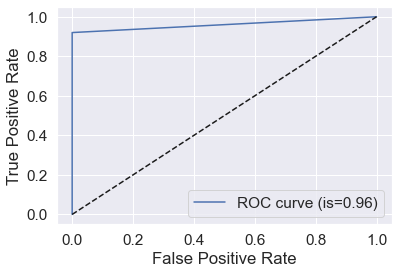

In [34]:
from sklearn import metrics
#fpr = false positive rate
#tpr = true positive rate
y_pred_LR = model_LR.predict(X_full_test)
fpr, tpr, thresholds =metrics.roc_curve(y_test,y_pred_LR)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, label= "ROC curve (is=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

- The blue line represents the actual performance of our model;

- The dashed line is a reference line, a random guess model that (in the case of two classes) output positive with 50% probability

More the ROC curve is close to upper left corner the better it is, it means it's good in distinguishing between false positive rate (**1 - specificity**) and true positive rate (**sensitivity**). 

AUC is 0.96.

### 2.1.3 Feature Selection

Forward selection can be applied to classification. 
We used the cross validation accurary to decide which is the best number of features to select, while the train accuracy for selecting the caniddates.


In [35]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator   

def get_cv_evaluator(scorer, cv=3):
    def evaluator(model, X, y, trained=False):            
        scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
        if not trained:
            model = model.fit(X, y)
        return model, np.mean(scores)
    
    return evaluator

def get_val_evaluator(scorer, val_size=0.1):
    def evaluator(model, X, y, trained=False):
        X_train_small, X_val, y_train_small, y_val = train_test_split(X, y, 
                                                                      test_size=val_size,
                                                                      random_state=0)
        
        if not trained:
            model = model.fit(X_train_small, y_train_small)
        score = scorer(model, X_val, y_val) 
        
        return model, score
    
    return evaluator

def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...P features
    # =========================================
    for dim in range(len(all_features)):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        remaining_features = all_features.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            # //==========================================\\
            # || ***** Difference from previous lab ***** ||
            # \\==========================================//
            model = LogisticRegression(solver="newton-cg", penalty='none')
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Update selected feature
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim+1, dim+1, best_features))
            print("M{} subset score (3.): {}".format(dim+1, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()

............
Best model (M1) with 1 features: ['unif_cell_size']
M1 subset score (3.): 0.9322895622895624
............
Best model (M2) with 2 features: ['unif_cell_size', 'bare_nuclei']
M2 subset score (3.): 0.9542087542087543
............
Best model (M3) with 3 features: ['unif_cell_size', 'bare_nuclei', 'normal_nucleoli']
M3 subset score (3.): 0.9615488215488215
............
Best model (M4) with 4 features: ['unif_cell_size', 'bare_nuclei', 'normal_nucleoli', 'mitoses']
M4 subset score (3.): 0.9652188552188552
............
Best model (M5) with 5 features: ['unif_cell_size', 'bare_nuclei', 'normal_nucleoli', 'mitoses', 'clump_thickness']
M5 subset score (3.): 0.9671043771043772
............
Best model (M6) with 6 features: ['unif_cell_size', 'bare_nuclei', 'normal_nucleoli', 'mitoses', 'clump_thickness', 'bland_chromatin']
M6 subset score (3.): 0.9670707070707071
............
Best model (M7) with 7 features: ['unif_cell_size', 'bare_nuclei', 'normal_nucleoli', 'mitoses', 'clump_thickn

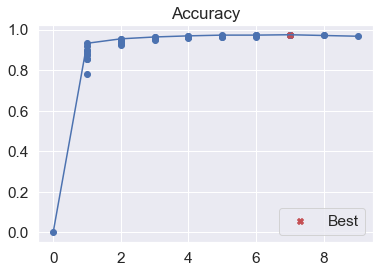

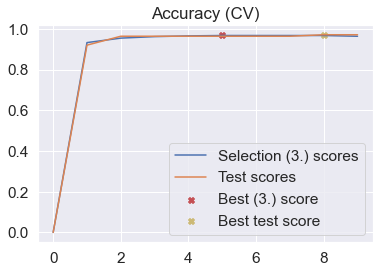

In [36]:
cv = 10
forward_selection(X_full_train, y_train, X_full_test, y_test,
                  get_evaluator(make_scorer(accuracy)), np.argmax, # 2.
                  get_cv_evaluator(make_scorer(accuracy), cv), np.argmax, # 3.
                  get_evaluator(make_scorer(accuracy)), np.argmax, # test
                  candidates_scorer_name="Accuracy",
                  subsets_scorer_name="Accuracy (CV)",
                  verbose=True, weight_step3=cv)

**Observation**: The best configuration obtained with forward selection has 5 features ['unif_cell_size', 'bare_nuclei', 'normal_nucleoli', 'mitoses', 'clump_thickness'].
We did not obtain results similar to those obtained with statistical test. Though, it did detect the feature with the strongest statistical test rejection 'clum_thickness'.

### 2.1.4 Feature Selection with LASSO

The LogisticRegression module in scikit-learn has an extra penality term which, if set to 'l1', will introduce a Lasso term in the loss. The C argument controls the lambda parameter in the loss (defined as the opposite of lambda): smaller values specify stronger regularization.

LogisticRegression(C=0.0001, penalty='l1', solver='saga')

LogisticRegression(C=0.0203010101010101, penalty='l1', solver='saga')

LogisticRegression(C=0.040502020202020206, penalty='l1', solver='saga')

LogisticRegression(C=0.06070303030303031, penalty='l1', solver='saga')

LogisticRegression(C=0.08090404040404041, penalty='l1', solver='saga')

LogisticRegression(C=0.10110505050505052, penalty='l1', solver='saga')

LogisticRegression(C=0.12130606060606061, penalty='l1', solver='saga')

LogisticRegression(C=0.1415070707070707, penalty='l1', solver='saga')

LogisticRegression(C=0.1617080808080808, penalty='l1', solver='saga')

LogisticRegression(C=0.1819090909090909, penalty='l1', solver='saga')

LogisticRegression(C=0.20211010101010102, penalty='l1', solver='saga')

LogisticRegression(C=0.2223111111111111, penalty='l1', solver='saga')

LogisticRegression(C=0.2425121212121212, penalty='l1', solver='saga')

LogisticRegression(C=0.2627131313131313, penalty='l1', solver='saga')

LogisticRegression(C=0.2829141414141414, penalty='l1', solver='saga')

LogisticRegression(C=0.3031151515151515, penalty='l1', solver='saga')

LogisticRegression(C=0.3233161616161616, penalty='l1', solver='saga')

LogisticRegression(C=0.3435171717171717, penalty='l1', solver='saga')

LogisticRegression(C=0.36371818181818183, penalty='l1', solver='saga')

LogisticRegression(C=0.38391919191919194, penalty='l1', solver='saga')

LogisticRegression(C=0.40412020202020205, penalty='l1', solver='saga')

LogisticRegression(C=0.4243212121212121, penalty='l1', solver='saga')

LogisticRegression(C=0.4445222222222222, penalty='l1', solver='saga')

LogisticRegression(C=0.4647232323232323, penalty='l1', solver='saga')

LogisticRegression(C=0.4849242424242424, penalty='l1', solver='saga')

LogisticRegression(C=0.5051252525252525, penalty='l1', solver='saga')

LogisticRegression(C=0.5253262626262626, penalty='l1', solver='saga')

LogisticRegression(C=0.5455272727272727, penalty='l1', solver='saga')

LogisticRegression(C=0.5657282828282828, penalty='l1', solver='saga')

LogisticRegression(C=0.585929292929293, penalty='l1', solver='saga')

LogisticRegression(C=0.606130303030303, penalty='l1', solver='saga')

LogisticRegression(C=0.6263313131313132, penalty='l1', solver='saga')

LogisticRegression(C=0.6465323232323232, penalty='l1', solver='saga')

LogisticRegression(C=0.6667333333333333, penalty='l1', solver='saga')

LogisticRegression(C=0.6869343434343435, penalty='l1', solver='saga')

LogisticRegression(C=0.7071353535353535, penalty='l1', solver='saga')

LogisticRegression(C=0.7273363636363637, penalty='l1', solver='saga')

LogisticRegression(C=0.7475373737373737, penalty='l1', solver='saga')

LogisticRegression(C=0.7677383838383839, penalty='l1', solver='saga')

LogisticRegression(C=0.7879393939393939, penalty='l1', solver='saga')

LogisticRegression(C=0.8081404040404041, penalty='l1', solver='saga')

LogisticRegression(C=0.8283414141414142, penalty='l1', solver='saga')

LogisticRegression(C=0.8485424242424242, penalty='l1', solver='saga')

LogisticRegression(C=0.8687434343434344, penalty='l1', solver='saga')

LogisticRegression(C=0.8889444444444444, penalty='l1', solver='saga')

LogisticRegression(C=0.9091454545454546, penalty='l1', solver='saga')

LogisticRegression(C=0.9293464646464646, penalty='l1', solver='saga')

LogisticRegression(C=0.9495474747474748, penalty='l1', solver='saga')

LogisticRegression(C=0.9697484848484849, penalty='l1', solver='saga')

LogisticRegression(C=0.9899494949494949, penalty='l1', solver='saga')

LogisticRegression(C=1.010150505050505, penalty='l1', solver='saga')

LogisticRegression(C=1.0303515151515152, penalty='l1', solver='saga')

LogisticRegression(C=1.0505525252525252, penalty='l1', solver='saga')

LogisticRegression(C=1.0707535353535353, penalty='l1', solver='saga')

LogisticRegression(C=1.0909545454545455, penalty='l1', solver='saga')

LogisticRegression(C=1.1111555555555557, penalty='l1', solver='saga')

LogisticRegression(C=1.1313565656565656, penalty='l1', solver='saga')

LogisticRegression(C=1.1515575757575758, penalty='l1', solver='saga')

LogisticRegression(C=1.171758585858586, penalty='l1', solver='saga')

LogisticRegression(C=1.1919595959595959, penalty='l1', solver='saga')

LogisticRegression(C=1.212160606060606, penalty='l1', solver='saga')

LogisticRegression(C=1.2323616161616162, penalty='l1', solver='saga')

LogisticRegression(C=1.2525626262626264, penalty='l1', solver='saga')

LogisticRegression(C=1.2727636363636363, penalty='l1', solver='saga')

LogisticRegression(C=1.2929646464646465, penalty='l1', solver='saga')

LogisticRegression(C=1.3131656565656566, penalty='l1', solver='saga')

LogisticRegression(C=1.3333666666666666, penalty='l1', solver='saga')

LogisticRegression(C=1.3535676767676768, penalty='l1', solver='saga')

LogisticRegression(C=1.373768686868687, penalty='l1', solver='saga')

LogisticRegression(C=1.393969696969697, penalty='l1', solver='saga')

LogisticRegression(C=1.414170707070707, penalty='l1', solver='saga')

LogisticRegression(C=1.4343717171717172, penalty='l1', solver='saga')

LogisticRegression(C=1.4545727272727274, penalty='l1', solver='saga')

LogisticRegression(C=1.4747737373737373, penalty='l1', solver='saga')

LogisticRegression(C=1.4949747474747475, penalty='l1', solver='saga')

LogisticRegression(C=1.5151757575757576, penalty='l1', solver='saga')

LogisticRegression(C=1.5353767676767678, penalty='l1', solver='saga')

LogisticRegression(C=1.5555777777777777, penalty='l1', solver='saga')

LogisticRegression(C=1.575778787878788, penalty='l1', solver='saga')

LogisticRegression(C=1.595979797979798, penalty='l1', solver='saga')

LogisticRegression(C=1.6161808080808082, penalty='l1', solver='saga')

LogisticRegression(C=1.6363818181818182, penalty='l1', solver='saga')

LogisticRegression(C=1.6565828282828283, penalty='l1', solver='saga')

LogisticRegression(C=1.6767838383838385, penalty='l1', solver='saga')

LogisticRegression(C=1.6969848484848484, penalty='l1', solver='saga')

LogisticRegression(C=1.7171858585858586, penalty='l1', solver='saga')

LogisticRegression(C=1.7373868686868688, penalty='l1', solver='saga')

LogisticRegression(C=1.757587878787879, penalty='l1', solver='saga')

LogisticRegression(C=1.7777888888888889, penalty='l1', solver='saga')

LogisticRegression(C=1.797989898989899, penalty='l1', solver='saga')

LogisticRegression(C=1.8181909090909092, penalty='l1', solver='saga')

LogisticRegression(C=1.8383919191919191, penalty='l1', solver='saga')

LogisticRegression(C=1.8585929292929293, penalty='l1', solver='saga')

LogisticRegression(C=1.8787939393939395, penalty='l1', solver='saga')

LogisticRegression(C=1.8989949494949496, penalty='l1', solver='saga')

LogisticRegression(C=1.9191959595959596, penalty='l1', solver='saga')

LogisticRegression(C=1.9393969696969697, penalty='l1', solver='saga')

LogisticRegression(C=1.95959797979798, penalty='l1', solver='saga')

LogisticRegression(C=1.9797989898989898, penalty='l1', solver='saga')

LogisticRegression(C=2.0, penalty='l1', solver='saga')

Text(0.5, 0, 'C=1/lambda')

Text(0, 0.5, 'beta')

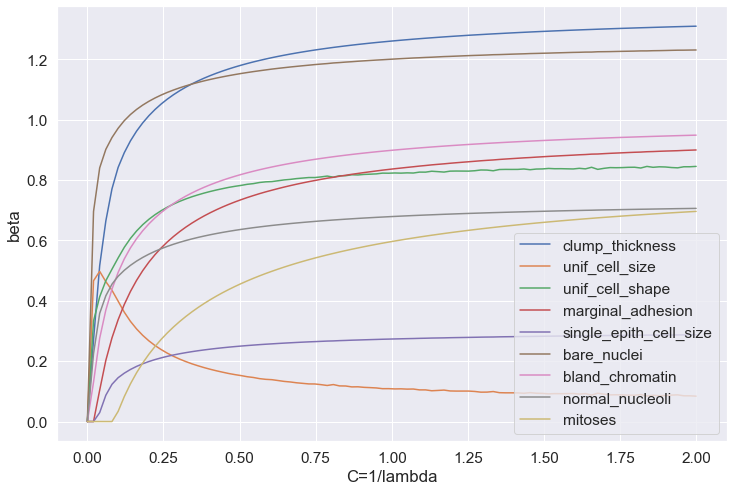

In [37]:
%%capture --no-display 
plt.rcParams["figure.figsize"] = (12,8)
C_vals = np.linspace(1e-4, 2, 100)
betas = []

from sklearn import preprocessing
X_std = preprocessing.scale(X_full_train) #data normalization

for C in C_vals:
    model_lasso = LogisticRegression(solver='saga', penalty='l1', C=C)
    model_lasso.fit(X_std, y_train)
    beta = model_lasso.coef_.reshape(-1)
    #beta = (beta - beta.min()) / beta.ptp()
    betas.append(beta)
betas = np.stack(betas, axis=1)  # [Nfeat, NCvals]

for beta, name in zip(betas, features):
    plt.plot(C_vals, beta, label=name)

plt.legend()
plt.xlabel("C=1/lambda")
plt.ylabel("beta")

**Observation**: Reading the graph left to right:

- The last features to disappear are 'clump_thickness' and 'bare_nuclei'. Both were also identified in forward feature selection. So they can be thought as the most important features for prediction.

- Strangely, the first feature going to zero is 'unif_cell_size' which is one of the features with highest correlation with target 'class' and which has been included in the forward features selection. We would have expected 'mitoses' to be going to zero.



## 2.2 Classification with Linear Discriminant Analysis

LDA is based on a similar concept of Logistic Regression, that is to model posterior probabilities as a **linear function of $x$**. However, the relation is found through the Bayes Theorem instead of the logistic function.

LDA assumes that:

- the density functions P(X|Y=k) of X in class K are distributed as a multivariate Gaussian 

- the classes have a common covariance matrix $\Sigma$ (we have one multivariate gaussian distribution for each class $k$, all having the same covariance $\Sigma_k = \Sigma \quad\forall k$)


<ins>**Model with all features**<ins>

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA(store_covariance=True, n_components=1)
model_LDA = model_LDA.fit(X_full_train, y_train)

print("Train accuracy:", accuracy(y_train, model_LDA.predict(X_full_train)))
print("Test accuracy:", accuracy(y_test, model_LDA.predict(X_full_test)))

Train accuracy: 0.9615384615384616
Test accuracy: 0.9635036496350365


The test accuracy with LDA decreases just a tiny bit with respect to Multiple Logistic Regression (from 97% to 96%).

In [39]:
EVR = model_LDA.explained_variance_ratio_
for idx, R in enumerate(EVR):
    print("Component {}: {}% var".format(idx+1, np.round(R*100,2)))

Component 1: 100.0% var


An overview of how much variance, you let go of can be expressed in terms of explained variance ratio. This ratio tells how much variance the first component explain in percentage.

<ins>**ROC curve**<ins>
    
An ROC curve is a graph showing the performance of a classification model. The area under the curve AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

0.95

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

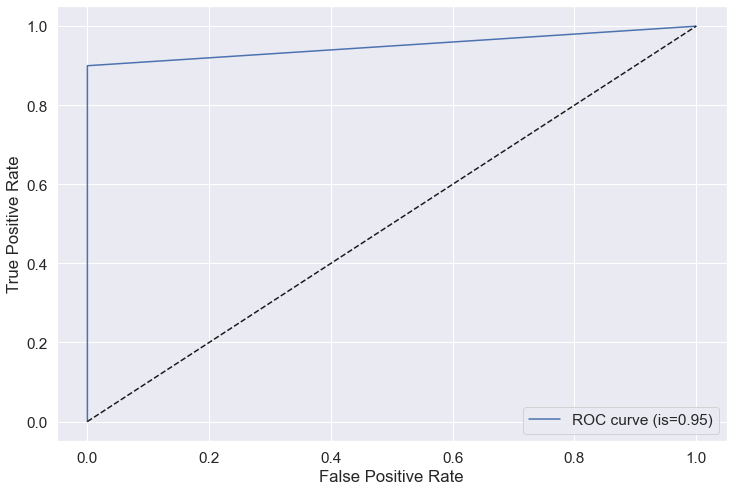

In [40]:
from sklearn import metrics
#fpr = false positive rate
#tpr = true positive rate
y_pred = model_LDA.predict(X_full_test)
fpr, tpr, thresholds =metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, label= "ROC curve (is=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

- The blue line represents the actual performance of our model;

- The dashed line is a reference line, a random guess model that (in the case of two classes) output positive with 50% probability.

More the ROC curve is close to upper left corner the better it is, it means it's good in distinguishing between false positive rate (**1 - specificity**) and true positive rate (**sensitivity**).

The ROC curve is 0.95.

<ins>**Plotting the distributions using confidence ellipses**<ins>
    
In order to plot those distribution I fitted the LDA model with the two features which are last to disappear in Lasso correction, which also had a low p-value in Z-test.

In [41]:
from math import atan, degrees
from matplotlib import colors
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches

def plot_gaussian(model, mu, covar, x, y=None, n_stdev_bands=2):
    if not isinstance(x, np.ndarray):
        x = np.array(x)
    if covar.ndim == 2:
        covar = np.repeat(covar[None], mu.shape[0], axis=0)
    variance, transforms = np.linalg.eigh(covar)

    ax = plt.subplot(111, aspect='equal')
    legend = []
    if mu.shape[-1] == 2:
        stdev = np.sqrt(variance)
        max_x, min_x, max_y, min_y = 0.0, 0.0, 0.0, 0.0
        cmap = cm.rainbow(np.linspace(0, 1, mu.shape[0]))
        for mean, stdev, transform, color in zip(mu, stdev, transforms, cmap):
            legend += [mpatches.Patch(color=color,
                                      label=f'mu {mean[0]:.2f}, {mean[1]:.2f} '
                                      f'sigma {stdev[0]:.2f} {stdev[1]:.2f}')]
            for j in range(1, n_stdev_bands + 1):
                ell = mpatches.Ellipse(xy=(mean[0], mean[1]),
                                       width=stdev[0] * j * 2, height=stdev[1] * j * 2,
                                       angle=degrees(atan(transform[0, 1] / transform[0, 0])),
                                       alpha=1.0,
                                       edgecolor=color,
                                       fc='none')
                ax.add_artist(ell)
                max_x = max(max_x, mean[0] + stdev[0] * j * 1.5)
                max_y = max(max_y, mean[1] + stdev[1] * j * 1.5)
                min_x = min(min_x, mean[0] - stdev[0] * j * 1.5)
                min_y = min(min_y, mean[1] - stdev[1] * j * 1.5)
    else:
        max_x, min_x = x[:, 0].max()+x[:, 0].ptp()/2, x[:, 0].min()-x[:, 0].ptp()/2
        max_y, min_y = x[:, 1].max()+x[:, 1].ptp()/2, x[:, 1].min()-x[:, 1].ptp()/2
        
    xx, yy = np.meshgrid(np.linspace(min_x, max_x, 1000),
                         np.linspace(min_y, max_y, 1000))

    X_fake = np.stack([xx, yy], axis=-1).reshape(-1, 2)    
    Z = model.predict_proba(X_fake)
    Z = Z[:, 1].reshape(xx.shape)
    
    cmap_light = colors.ListedColormap(['#AAAAFF', '#FFAAAA'])
    cmap_solid = colors.ListedColormap(['#0000FF', '#FF0000'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], colors='grey')

    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_solid)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.legend(handles=legend)

    plt.show()

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_feat = ['clump_thickness', 'bare_nuclei']
X_two = df[X_feat]
X_two_train, X_two_test, y_train, y_test = train_test_split(X_two, y,
                                                    test_size=0.2, 
                                                    random_state=SEED)

model_two = LDA(store_covariance=True)
model_two = model_two.fit(X_two_train, y_train)

print("Train accuracy:", accuracy(y_train, model_two.predict(X_two_train)))
print("Test accuracy:", accuracy(y_test, model_two.predict(X_two_test)))

Train accuracy: 0.9285714285714286
Test accuracy: 0.9562043795620438


Test accuracy with just two features is slightly lower than the one of the model with all features (1% difference).

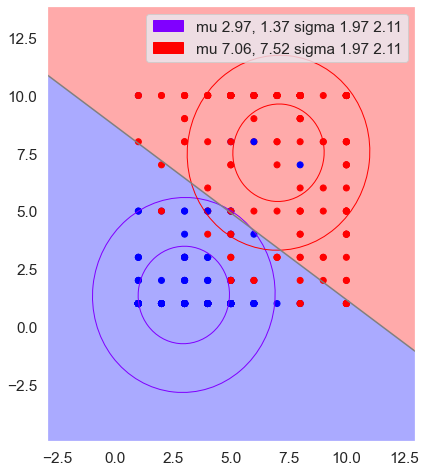

In [43]:
%%capture --no-display 
plot_gaussian(model_two, model_two.means_, model_two.covariance_, X_two_train, y_train)

**Observation:**

We clearly see that the two Gaussians have same sizes and orientations, suggesting that they've got the same covariance matrix, as expected in LDA. 

### 2.1.1 LDA with polynomial features

Using the quadratic polynomial features and plot the decision boundary, which won't be linear anymore.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model_two_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lda', LDA(store_covariance=True))])
model_two_poly = model_two_poly.fit(X_two_train, y_train)

print("Train accuracy:", accuracy(y_train, model_two_poly.predict(X_two_train)))
print("Test accuracy:", accuracy(y_test, model_two_poly.predict(X_two_test)))

Train accuracy: 0.9377289377289377
Test accuracy: 0.9635036496350365


<ins>**Plotting the distributions using confidence ellipses**<ins>
    
In order to plot those distribution I fitted the LDA model with the two features which are last to disappear in Lasso correction, which also had a low p-value in Z-test.

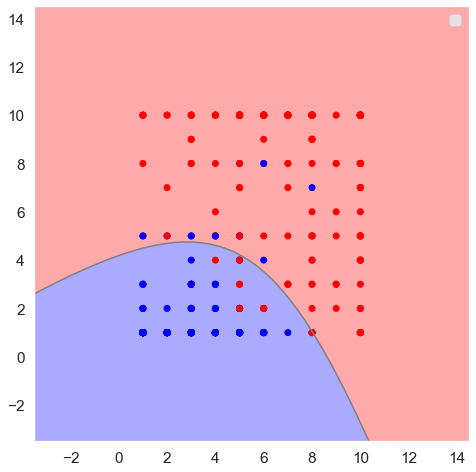

In [45]:
%%capture --no-display 
lda_two_model = model_two_poly.steps[-1][-1]
plot_gaussian(model_two_poly, lda_two_model.means_, lda_two_model.covariance_, X_two_train, y=y_train)

Now the boundary is not linear anymore.

### 2.1.2 Optimal hyper-parameter for LDA with all features

Let's try to find the optimal hyper-parameter by using corss validation.

In [46]:
from sklearn.model_selection import GridSearchCV

model_poly = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA(store_covariance=True))])
params = {'poly__degree': range(1, 6)}
cv = GridSearchCV(model_poly, params, refit=True, cv=10, 
                  scoring=make_scorer(accuracy))
cv.fit(X_full_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lda',
                                        LinearDiscriminantAnalysis(store_covariance=True))]),
             param_grid={'poly__degree': range(1, 6)},
             scoring=make_scorer(accuracy))

In [47]:
cv.best_params_
cv.best_score_
pd.DataFrame(cv.cv_results_)

{'poly__degree': 2}

0.9651851851851851

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011178,0.003521,0.002601,0.001021,1,{'poly__degree': 1},0.945455,0.945455,0.963636,0.981818,0.945455,0.981818,0.944444,0.981481,0.981481,0.907407,0.957845,0.023419,2
1,0.016417,0.006794,0.002401,0.001018,2,{'poly__degree': 2},0.963636,0.963636,0.945455,1.000000,0.945455,0.981818,0.962963,0.981481,0.962963,0.944444,0.965185,0.017256,1
2,0.064765,0.012755,0.002939,0.001397,3,{'poly__degree': 3},0.872727,0.872727,0.909091,0.854545,0.890909,0.781818,0.777778,0.870370,0.870370,0.833333,0.853367,0.041326,4
3,0.167077,0.025194,0.002704,0.000458,4,{'poly__degree': 4},0.927273,0.927273,0.800000,0.909091,0.854545,0.836364,0.851852,0.870370,0.870370,0.833333,0.868047,0.039993,3
4,0.667303,0.034000,0.003043,0.000463,5,{'poly__degree': 5},0.818182,0.890909,0.818182,0.872727,0.854545,0.818182,0.796296,0.851852,0.833333,0.796296,0.835051,0.030104,5


  (best 2) CV accuracy: 0.9651851851851851
  (best 2) Test accuracy: 0.9562043795620438


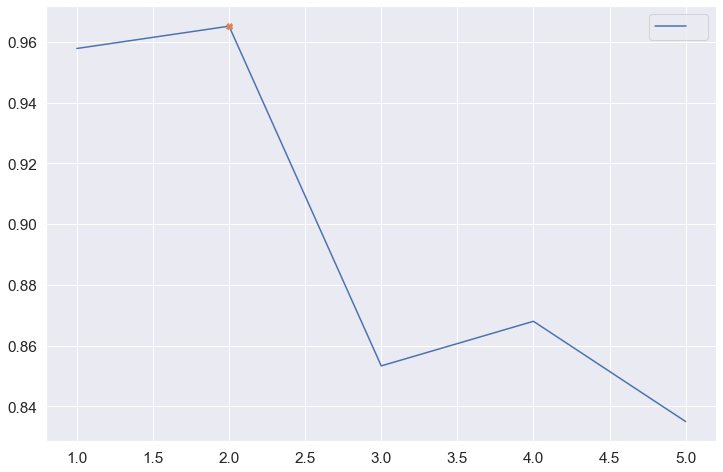

In [48]:
def show_results(cv, X_test, params, prefix=''):
    prefix = ' '+prefix    
    results = pd.DataFrame(cv.cv_results_)
    plt.plot(results[params], results['mean_test_score'], label=prefix)

    best_idx = np.argmax(results['mean_test_score'])
    plt.plot(results[params][best_idx], 
             results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV accuracy:",  cv.best_score_)
    print(prefix, f"(best {results[params][best_idx]}) Test accuracy:", accuracy(y_test, cv.best_estimator_.predict(X_test)))
    
show_results(cv, X_full_test, 'param_poly__degree')

With cross-validation the accuracy slightly improves by 1%.  The best polynomial degree is 2.

## 2.3 Classification with Quadratic Discriminant Analysis

By removing the assumption that density functions must have the same covariance matrix, we obtain a quadratic relation, proper of QDA.

In [49]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_QDA = QDA(store_covariance=True)
model_QDA = model_QDA.fit(X_full_train, y_train)

print("Train accuracy:", accuracy(y_train, model_QDA.predict(X_full_train)))
print("Test accuracy:", accuracy(y_test, model_QDA.predict(X_full_test)))

Train accuracy: 0.9633699633699634
Test accuracy: 0.9416058394160584


<ins>**ROC curve**<ins>
    
An ROC curve is a graph showing the performance of a classification model. The area under the curve AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).

0.9370114942528736

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

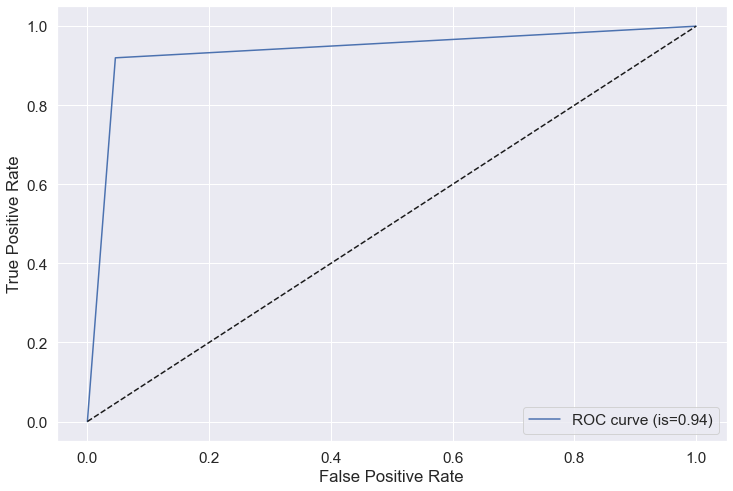

In [50]:
from sklearn import metrics
#fpr = false positive rate
#tpr = true positive rate
y_pred_QDA = model_QDA.predict(X_full_test)
fpr, tpr, thresholds =metrics.roc_curve(y_test,y_pred_QDA)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr, tpr, label= "ROC curve (is=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

- The blue line represents the actual performance of our model;

- The dashed line is a reference line, a random guess model that (in the case of two classes) output positive with 50% probability.

More the ROC curve is close to upper left corner the better it is, it means it's good in distinguishing between false positive rate (**1 - specificity**) and true positive rate (**sensitivity**).

The ROC curve is 0.94.

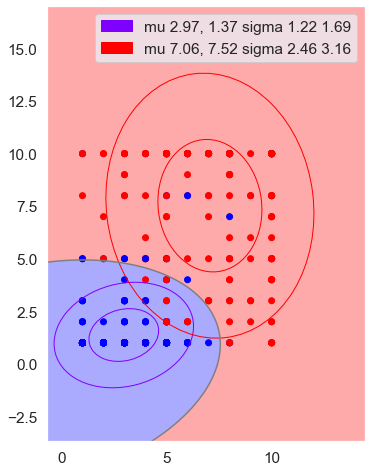

In [51]:
%%capture --no-display 

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_two_QDA = QDA(store_covariance=True)
model_two_QDA = model_two_QDA.fit(X_two_train, y_train)

print("Train accuracy:", accuracy(y_train, model_two_QDA.predict(X_two_train)))
print("Test accuracy:", accuracy(y_test, model_two_QDA.predict(X_two_test)))
plot_gaussian(model_two_QDA, model_two_QDA.means_, np.stack(model_two_QDA.covariance_, axis=0), X_two_train, y_train, 2)

**Observation:**

We clearly see that in this case the two gaussians have different sizes and orientations, suggesting a different covariance matrix, as expected in QDA. 

The points which the boundary is including/excluding are the same as in LDA with polynomial features.

## 2.4 Classification with KNN

KNN utilizes distance information in the neighborhood to make predictions. Since it is based on computation on distances, the impact of normalization may be significant, especially if features present very heterogeneous ranges. Here we compare ...

<ins>**Normalizing the dataset with zscaled and min max scaled transformations**<ins>

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

ss = StandardScaler()
mms = MinMaxScaler()

# create hardcopies
X_full_train_zscaled=X_full_train.copy()
X_full_test_zscaled=X_full_test.copy()

X_full_train_minmaxscaled=X_full_train.copy()
X_full_test_minmaxscaled=X_full_test.copy()

# create normalized
X_full_train_zscaled = ss.fit_transform(X_full_train_zscaled)
X_full_test_zscaled = ss.transform(X_full_test_zscaled)

X_full_train_minmaxscaled = mms.fit_transform(X_full_train_zscaled)
X_full_test_minmaxscaled = mms.transform(X_full_test_zscaled)


We first fit the full model without normalization, with zscore norm. and min max norm.

In [63]:
%%capture --no-display 
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
params = {'n_neighbors': range(1, 15)}

cv = GridSearchCV(model, params)
cv.fit(X_full_train, y_train)


# zscaled
cvznorm = GridSearchCV(model, params)
cvznorm.fit(X_full_train_zscaled, y_train)
cvznorm.best_estimator_


# min max
cvmmnorm = GridSearchCV(model, params)
cvmmnorm.fit(X_full_train_minmaxscaled, y_train)


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 15)})

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 15)})

KNeighborsClassifier(n_neighbors=7)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(1, 15)})

In [64]:
cv.best_estimator_
cvznorm.best_estimator_
cvmmnorm.best_estimator_

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=3)

Printing the best k for each dataset: k changes for knn_znorm. 

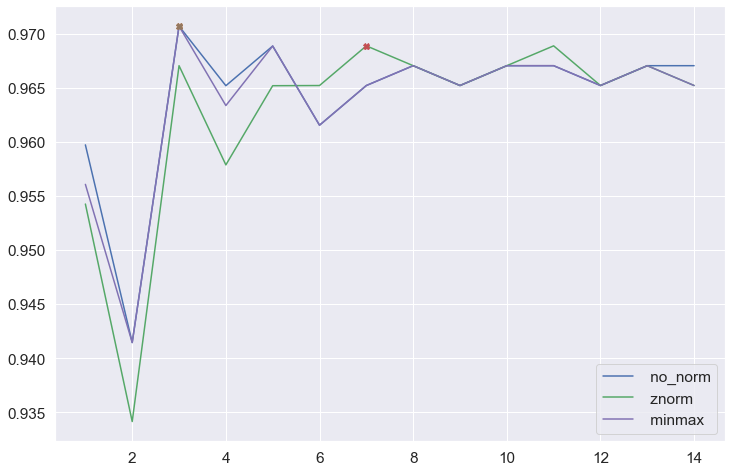

In [133]:
%%capture --no-display 
show_results(cv, X_full_test, 'param_n_neighbors', 'no_norm')
show_results(cvznorm, X_full_test_zscaled, 'param_n_neighbors', 'znorm')
show_results(cvmmnorm, X_full_test_minmaxscaled, 'param_n_neighbors', 'minmax')

In [138]:
cv_train_acc = accuracy_score(cv.predict(X_full_train), y_train)
cv_test_acc = accuracy_score(cv.predict(X_full_test), y_test)

print("CV train accuracy:", cv_train_acc)
print("CV test accuracy:", cv_test_acc)

cvznorm_train_acc = accuracy_score(cvznorm.predict(X_full_train_zscaled), y_train)
cvznorm_test_acc = accuracy_score(cvznorm.predict(X_full_test_zscaled), y_test)

print("CVznorm train accuracy:", cvznorm_train_acc)
print("CVznorm test accuracy:", cvznorm_test_acc)

cvmmnorm_train_acc = accuracy_score(cvmmnorm.predict(X_full_train_minmaxscaled), y_train)
cvmmnorm_test_acc = accuracy_score(cvmmnorm.predict(X_full_test_minmaxscaled), y_test)

print("CVmmnorm train accuracy:", cvmmnorm_train_acc)
print("CVmmnorm test accuracy:", cvmmnorm_test_acc)

CV train accuracy: 0.9816849816849816
CV test accuracy: 0.9635036496350365
CVznorm train accuracy: 0.9743589743589743
CVznorm test accuracy: 0.9635036496350365
CVmmnorm train accuracy: 0.9816849816849816
CVmmnorm test accuracy: 0.9635036496350365


Regardless the presence and type of normalization, there is no difference in model performance. 

## 2.5 Support Vector Machines (SVM)


In this section we test the performance of Support Vector Machines (SVM) using a Radial Basis Function (RBF) as kernel function.

The usage of kernel functions in SVM allows to model non linear boundaries between the classes. 

The usage of kernel functions is not limited to SVM, but it can also applied to logistic regression. However, in the latter case, it is generally computationally expensive. On the other hand, the nature of SVM (in which the classifier revolves on support vectors) implies a natural speed up of computation performance when using kernels compared to kernel logistic regression. 

In RBF kernel SVM, the principal hyperparameters are:
- gamma: which is a parameter of the kernel function (whidth of the gaussian function).  Larger gamma leads to more complex boundaries. If set to high it leads to overfitting.
- C: is related to the strength of regularization. SVM are generally trained using hinge loss and L2 regularization.


In our analysis we'll take into consideration if normalization affects performance of the model, considering also the presence of the kernel functions


### 2.5.1 SVM Full model, not normalized

In [116]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

param_grid = {'C': [0.001,  0.01, 0.1, 1, 5, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

gscv_svmfull_nn = GridSearchCV(SVC(kernel='rbf', probability = True), param_grid, 
                        cv=5, scoring='accuracy', refit=True)

gscv_svmfull_nn.fit(X_full_train, y_train)

gscv_svmfull_nn.best_estimator_

gscv_svmfull_nn_train_acc = accuracy_score(gscv_svmfull_nn.predict(X_full_train), y_train)
gscv_svmfull_nn_test_acc = accuracy_score(gscv_svmfull_nn.predict(X_full_test), y_test)

print("SVM train accuracy:", gscv_svmfull_nn_train_acc)
print("SVM test accuracy:", gscv_svmfull_nn_test_acc)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

SVC(C=0.1, gamma=0.01, probability=True)

SVM train accuracy: 0.9725274725274725
SVM test accuracy: 0.9562043795620438


### 2.5.2 SVM Full model, z-normalized

In [118]:
# using previous grid
gscv_svmfull_znorm = GridSearchCV(SVC(kernel='rbf', probability = True), param_grid, 
                        cv=5, scoring='accuracy', refit=True)

gscv_svmfull_znorm.fit(X_full_train_zscaled, y_train)


gscv_svmfull_znorm_train_acc = accuracy_score(gscv_svmfull_znorm.predict(X_full_train_zscaled), y_train)
gscv_svmfull_znorm_test_acc = accuracy_score(gscv_svmfull_znorm.predict(X_full_test_zscaled), y_test)

print("SVM train accuracy:", gscv_svmfull_znorm_train_acc)
print("SVM test accuracy:", gscv_svmfull_znorm_test_acc)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

SVM train accuracy: 0.9725274725274725
SVM test accuracy: 0.9635036496350365


### 2.5.3 SVM Full model, min max normalized

In [119]:
# using previous grid
gscv_svmfull_minmaxnorm = GridSearchCV(SVC(kernel='rbf', probability = True), param_grid, 
                        cv=5, scoring='accuracy', refit=True)

gscv_svmfull_minmaxnorm.fit(X_full_train_minmaxscaled, y_train)


gscv_svmfull_minmaxnorm_train_acc = accuracy_score(gscv_svmfull_minmaxnorm.predict(X_full_train_minmaxscaled), y_train)
gscv_svmfull_minmaxnorm_test_acc = accuracy_score(gscv_svmfull_minmaxnorm.predict(X_full_test_minmaxscaled), y_test)

print("SVM train accuracy:", gscv_svmfull_minmaxnorm_train_acc)
print("SVM test accuracy:", gscv_svmfull_minmaxnorm_test_acc)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

SVM train accuracy: 0.9725274725274725
SVM test accuracy: 0.9562043795620438


## 2.6 Random forest classification (RFC)

**Brief description of the model:**

RF is an ensemble learning approach based on decision trees that can be utilized for both classification and regression problems. RF models are based on decisional trees, which creation revolves on the recursive partitioning of data space. The output of the prediction models is the averaged answer that comes from all the trees that compone the ensemble. Trees in RF are characterized for being built on a subset of data using the boosting aggregating algorithm.

The advantage of this method is the fact of being able to capture non linear relationships and, more generally, relationships that are not suitable for linear modelling. In addition to this, the method is generally not heavily affected by data values transformations, as well as the necessity to perform an accurate feature selection before model fitting (altough feature selection is advised). 

On the other hand, the output model is complex and it is not suitable for a straightforward interpetation. In addition, like other non-parametric methods, RF models may be prone to overfitting, altough they may be to be less prone to it compared to other tree based models. 

The choices regarding RFC model creation range from single tree characteristics to the whole "forest" (e.g. number of trees to build) and they are controlled by hyparameters that need to be tuned to the training dataset. This step allows to increase model performance. 


**Analytical approach utilized:**
In this classification task, we applied the same workflow utilized in RFC:

1. Hyperaparameter tuning on the global dataset
2. Model performance evaluation, Feature selection
3. Hyperaparameter tuning on the reduced dataset
4. Reduced model performance evaluation


<ins>**Loading libraries and functions, instantiating RFC and defining hyperparameter grid for their tuning**</ins>


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


rc = RandomForestClassifier(random_state=SEED)


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
l_est=len(n_estimators)


# Number of features to consider at every split
max_features = ['auto', 'sqrt']
l_features=len(max_features)

# Maximum depth: longest path between the root node and the leaf node
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)

l_max_depth=len(max_depth)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]


# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 15, num = 2)]


# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


<ins>**Performing hyperparameter tuning with Grind search, computationally expensive step**</ins>

(Estimated computation time on I7 9750H: approx 7 min), you can skip to the next two cells, since the best hyperparameters will be loaded in an other random forest classifier instance


In [69]:
# compute n. combinations
best_hp_search_fullmodel=GridSearchCV(estimator=rc,
                       param_grid=param_grid ,
                       scoring='roc_auc',
                       cv=5,
                       verbose=1,
                       n_jobs=-1);

best_hp_search_fullmodel.fit(X_full_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800, 850, 900, 950, 1000]},
             scoring='roc_auc', verbose=1)

In [70]:
best_hp_fullmodel = best_hp_search_fullmodel.best_estimator_
best_hp_fullmodel

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=650,
                       random_state=40)

In [72]:
rc_best_hp_fullmodel=RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=650,
                       random_state=40)

rc_best_hp_fullmodel.fit(X_full_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=650,
                       random_state=40)

**Observation**: the best Hyperparameters not to utilize bootstrapping. Bootstrapping is usually used in RF and it influences the  dataset input destinated to each decision tree. This allows to reduce overall overfitting. In this case, the model utilizes all of the data during the fitting process. However, in our case, the RF modell will still utilize a random subset of features at each split while growing trees, increasing variation and then reducing overfitting. 

In [73]:
acc_train_rc_best_hp_fullmodel = accuracy_score(rc_best_hp_fullmodel.predict(X_full_train), y_train)
acc_test_rc_best_hp_fullmodel = accuracy_score(rc_best_hp_fullmodel.predict(X_full_test), y_test)

print("RFC train accuracy:", gscv_svmfull_minmaxnorm_train_acc)
print("RFC test accuracy:", gscv_svmfull_minmaxnorm_test_acc)

RFC train accuracy: 0.9725274725274725
RFC test accuracy: 0.9562043795620438


**Conclusion**: the full model returns a performance in therms of test accuracy that is in the average to those obtained so far.

Next we will proced to feature selection, HP tuning of the reduced model and evaluation of the model performace.

<ins>**Feature selection based on features importances (Gini importance index)**</ins>


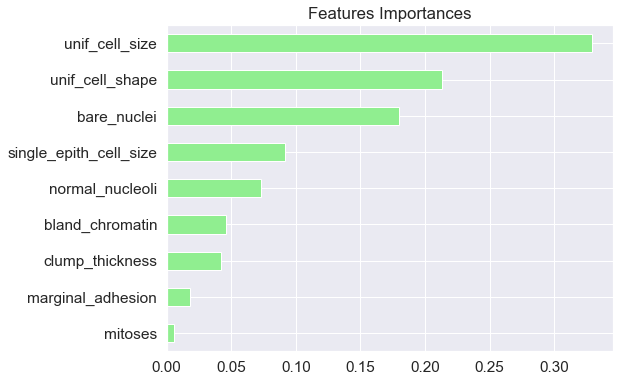

In [74]:
# Create a pd.Series of features importances
importances_numcoord_global = pd.Series(data=best_hp_fullmodel.feature_importances_,
                        index= X_full_train.columns)

# Sort importances
importances_numcoord_global = importances_numcoord_global.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(8, 6));
importances_numcoord_global.plot(kind='barh', color='lightgreen');
plt.title('Features Importances');
plt.show();

In [75]:
# Deep copy the original dataset
X_reduced_train=X_full_train.copy()
X_reduced_test=X_full_test.copy()

# Set variables to filter
variables_to_filter=['mitoses', 'marginal_adhesion', 'bland_chromatin', 'clump_thickness', 'normal_nucleoli',
                                        'single_epith_cell_size']

# Create the reduced df
X_reduced_train = X_reduced_train.drop(variables_to_filter, axis=1)
X_reduced_test = X_reduced_test.drop(variables_to_filter, axis=1)


<ins>**Performing hyperparameter tuning with Grind search, computationally expensive step**</ins>

(Estimated computation time on I7 9750H: approx  6 min), you can skip to the next two cells, since the best hyperparameters will be loaded in an other random forest classifier instance


In [76]:
# compute n. combinations
best_hp_search_reduced=GridSearchCV(estimator=rc,
                       param_grid=param_grid ,
                       scoring='roc_auc',
                       cv=5,
                       verbose=1,
                       n_jobs=-1);

best_hp_search_reduced.fit(X_reduced_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800, 850, 900, 950, 1000]},
             scoring='roc_auc', verbose=1)

In [77]:
best_hp_search_reduced = best_hp_search_reduced.best_estimator_
best_hp_search_reduced

RandomForestClassifier(min_samples_split=10, n_estimators=150, random_state=40)

In [108]:
rc_best_hp_redmodel=RandomForestClassifier(min_samples_split=10, n_estimators=150, random_state=40)

rc_best_hp_redmodel.fit(X_reduced_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=150, random_state=40)

**Observation**: in this case, bootstrap will be applied.

In [79]:
acc_train_rc_best_hp_reducedmodel = accuracy_score(rc_best_hp_redmodel.predict(X_reduced_train), y_train)
acc_test_rc_best_hp_reducedmodel = accuracy_score(rc_best_hp_redmodel.predict(X_reduced_test), y_test)

print("RFC train accuracy:", acc_train_rc_best_hp_reducedmodel)
print("RFC test accuracy:", acc_test_rc_best_hp_reducedmodel)

RFC train accuracy: 0.9706959706959707
RFC test accuracy: 0.9781021897810219


In [130]:
from sklearn.metrics import roc_auc_score
y_pred_proba = rfc_red.predict_proba(X_reduced_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('AUC',test_roc_auc)

AUC 0.9979310344827585


**Conclusion**: RFC is showing an overall good performance, with the full model scoring in the average range of test accuracy and the reduced model outperforming all the previously created models. 

Feature selection with RF indicates that scores of uniform cell size, shape and bare nuclei are the most usefull features for this classification task in the context of this dataset. This result is different to the one obtained during feature selection for logistic regression, altough we should consider that the two methods are profoundly different: in RF, in this case, the level of importance is the Gini importance, which indicates how much a feature tend to reduce impurity in the subsets created at each split during tree creation.

# 3. How to evaluate the best model

<ins>**Accurary comparation**</ins>

Using all set of features we could compare both the test accuracy and the one obtained with cross-validation for all the classification models we saw in this notebook.

In [120]:
lr = LogisticRegression(solver="newton-cg", penalty='none')
lda = LDA()
lda_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                     ('lda', LDA(store_covariance=True))])
qda = QDA()
knn = KNeighborsClassifier(n_neighbors=3)
knn_std = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=7))])
knn_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))])
svm = gscv_svmfull_nn

svm_std = Pipeline([
     ('norm', StandardScaler()),
     ('svm', gscv_svmfull_znorm)])
svm_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('svm', gscv_svmfull_minmaxnorm)])
rfc_full = rc_best_hp_fullmodel
rfc_red = rc_best_hp_redmodel

from collections import OrderedDict
models = OrderedDict([('lr',lr), ('lda', lda), ('lda_poly', lda_poly), ('qda', qda),
                      ('knn', knn), ('knn_std', knn_std), ('knn_minmax', knn_minmax), ('svm', svm), 
                     ('svm_std', svm_std), ('svm_minmax', svm_minmax), ('rfc_full', rfc_full), ('rfc_red', rfc_red)])


cv_scores, test_scores = [], []
for name, model in models.items():
    if not(name)=='rfc_red':
        scores = cross_val_score(model, X_full_train, y_train, 
        scoring=make_scorer(accuracy), cv=10)
        cv_score = np.mean(scores)
        cv_scores.append(cv_score)
        model.fit(X_full_train, y_train)
        test_score = accuracy(y_test, model.predict(X_full_test))
        test_scores.append(test_score)
        print("{} CV score: {:.4f},  test score {:.4f}".format(name, cv_score, test_score))
        
    elif name == 'rfc_red':
        scores = cross_val_score(model, X_reduced_train, y_train, 
        scoring=make_scorer(accuracy), cv=10)
        cv_score = np.mean(scores)
        cv_scores.append(cv_score)
        model.fit(X_reduced_train, y_train)
        test_score = accuracy(y_test, model.predict(X_reduced_test))
        test_scores.append(test_score)
        print("{} CV score: {:.4f},  test score {:.4f}".format(name, cv_score, test_score))

data = pd.DataFrame()
data['model'] = list(models.keys()) * 2
data['metric'] = ['10-cv accuracy'] * len(cv_scores) + ['test accuracy'] * len(test_scores)
data['score'] = cv_scores + test_scores



LogisticRegression(penalty='none', solver='newton-cg')

lr CV score: 0.9634,  test score 0.9708


LinearDiscriminantAnalysis()

lda CV score: 0.9578,  test score 0.9635


Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lda', LinearDiscriminantAnalysis(store_covariance=True))])

lda_poly CV score: 0.9652,  test score 0.9562


QuadraticDiscriminantAnalysis()

qda CV score: 0.9578,  test score 0.9416


KNeighborsClassifier(n_neighbors=3)

knn CV score: 0.9744,  test score 0.9635


Pipeline(steps=[('norm', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

knn_std CV score: 0.9670,  test score 0.9635


Pipeline(steps=[('norm', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

knn_minmax CV score: 0.9744,  test score 0.9635


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

svm CV score: 0.9688,  test score 0.9562


Pipeline(steps=[('norm', StandardScaler()),
                ('svm',
                 GridSearchCV(cv=5, estimator=SVC(probability=True),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10,
                                                100],
                                          'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                    100]},
                              scoring='accuracy'))])

svm_std CV score: 0.9725,  test score 0.9635


Pipeline(steps=[('norm', MinMaxScaler()),
                ('svm',
                 GridSearchCV(cv=5, estimator=SVC(probability=True),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10,
                                                100],
                                          'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                    100]},
                              scoring='accuracy'))])

svm_minmax CV score: 0.9706,  test score 0.9562


RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=650,
                       random_state=40)

rfc_full CV score: 0.9652,  test score 0.9635


RandomForestClassifier(min_samples_split=10, n_estimators=150, random_state=40)

rfc_red CV score: 0.9542,  test score 0.9781


<Figure size 1280x640 with 0 Axes>

<AxesSubplot:xlabel='model', ylabel='score'>

Text(0, 0.5, 'accuracy')

(0.9, 1.0)

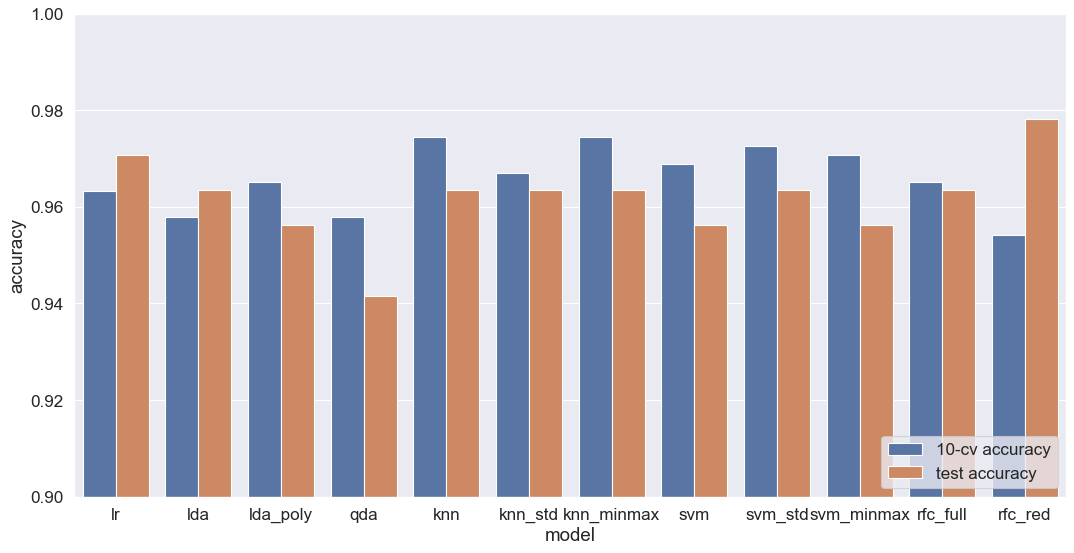

In [121]:
plt.figure(figsize=(16, 8), dpi=80)
sns.barplot(x='model', y='score', data=data, hue='metric')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.ylim(0.9, 1)


**Observation:**

- To make the difference in accuracy among models more visible, we limited the accuracy y axis between 0.9 and 1.

- The higher accuracy score was obtained by Random Forest Classification based on test score of the reduced dataset (97.8%).


<ins>**ROC curve comparation**</ins>


In [105]:
from sklearn.metrics import roc_curve
def plot_roc(predict_fn, X, y, label=None):
    fprs, tprs, t = roc_curve(y, predict_fn(X)[:,-1])
    
    # Plot the ROC
    plt.plot(fprs, tprs, label="ROC "+label)
    plt.xlabel("FPR = 1 - specificity")
    plt.ylabel("TPR = sensitivity")
    plt.legend()

LogisticRegression(penalty='none', solver='newton-cg')

LinearDiscriminantAnalysis()

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lda', LinearDiscriminantAnalysis())])

QuadraticDiscriminantAnalysis()

KNeighborsClassifier(n_neighbors=3)

Pipeline(steps=[('norm', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

Pipeline(steps=[('norm', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

Pipeline(steps=[('norm', StandardScaler()),
                ('svm',
                 GridSearchCV(cv=5, estimator=SVC(probability=True),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10,
                                                100],
                                          'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                    100]},
                              scoring='accuracy'))])

Pipeline(steps=[('norm', MinMaxScaler()),
                ('svm',
                 GridSearchCV(cv=5, estimator=SVC(probability=True),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10,
                                                100],
                                          'gamma': [0.001, 0.01, 0.1, 1, 10,
                                                    100]},
                              scoring='accuracy'))])

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=650,
                       random_state=40)

RandomForestClassifier(min_samples_split=10, n_estimators=150, random_state=40)

(0.75, 1.05)

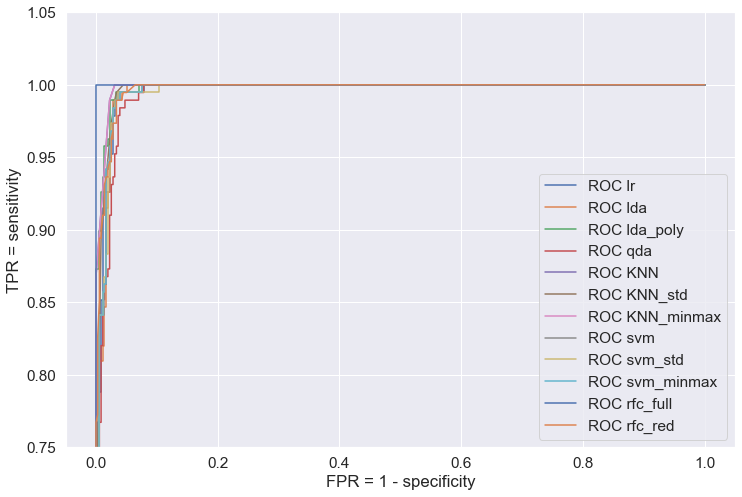

In [123]:
%%capture --no-display 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

lr = LogisticRegression(solver="newton-cg", penalty='none')

lda = LDA()
lda_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                     ('lda', LDA())])
qda = QDA()

knn = KNeighborsClassifier(n_neighbors=3)

knn_std = Pipeline([
    ('norm', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=7))])

knn_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))])

svm = gscv_svmfull_nn

svm_std = Pipeline([
     ('norm', StandardScaler()),
     ('svm', gscv_svmfull_znorm)])

svm_minmax = Pipeline([
    ('norm', MinMaxScaler()),
    ('svm', gscv_svmfull_minmaxnorm)])

rfc_full = rc_best_hp_fullmodel

rfc_red = rc_best_hp_redmodel

for name, model in [('lr', lr), 
                    ('lda', lda),
                    ('lda_poly', lda_poly), 
                    ('qda', qda),
                    ('KNN', knn),
                    ('KNN_std', knn_std),
                    ('KNN_minmax',knn_minmax),
                    ('svm', svm),
                    ('svm_std',svm_std), 
                    ('svm_minmax', svm_minmax),
                    ('rfc_full', rfc_full),
                    ('rfc_red', rfc_red)]:
    if not(name)=='rfc_red':
        model.fit(X_full_train, y_train)
        plot_roc(model.predict_proba, X_full_train, y_train, name)
    elif name =='rfc_red':
        model.fit(X_reduced_train, y_train)
        plot_roc(model.predict_proba, X_reduced_train, y_train, name)
plt.ylim(0.75, 1.05)

**Observation:**

- To make the AUC (area under the curve) among models more visible, we limited the TPR y axis between 0.75 and 1.05.

- The AUC is pretty similar for all the classification models. It seems that regardless the classification model used, the AUC is pretty high. The best performing model in terms of AUC is random forest with reduced number of features (~99.97%).